In [1]:
import imageio
import imgaug as ia
from imgaug import augmenters as iaa 
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
%matplotlib inline
ia.seed(1)

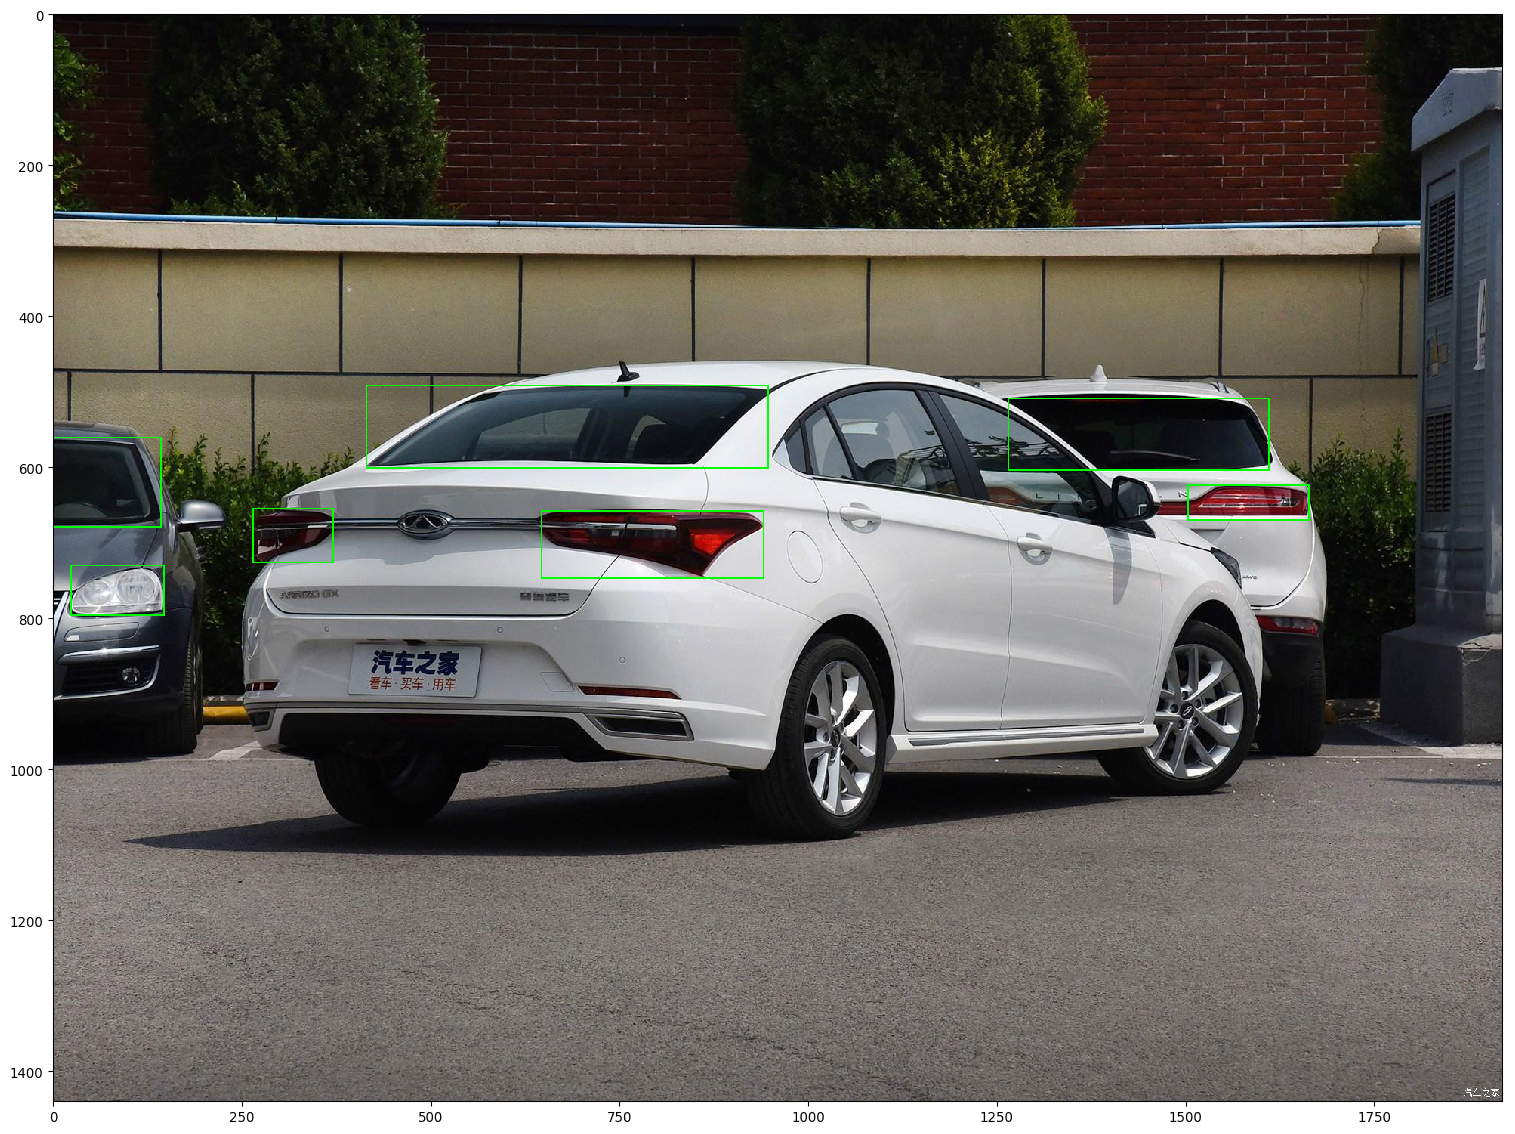

In [2]:
image = imageio.imread("data/aug/detect/test_detect.jpg")
# image = ia.imresize_single_image(image, (298, 447))

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=0, y1=562, x2=142, y2=679),
    BoundingBox(x1=415, y1=493, x2=946, y2=601),
    BoundingBox(x1=1265, y1=510, x2=1609, y2=604),
    BoundingBox(x1=265, y1=656, x2=370, y2=726),
    BoundingBox(x1=647, y1=659, x2=940, y2=747),
    BoundingBox(x1=1503, y1=625, x2=1662, y2=670),
    BoundingBox(x1=24, y1=731, x2=146, y2=796)
], shape=image.shape)

ia.imshow(bbs.draw_on_image(image, size=2))

In [29]:
seq = iaa.Sequential([
         #iaa.DirectedEdgeDetect(alpha=(0.2, 0.4), direction=(0.0, 1.0)), #噪声
         iaa.GammaContrast((0.8, 1.2), per_channel=True),
         iaa.OneOf([
                    #iaa.Multiply((1, 1.5), per_channel=0.5),
                    #iaa.MultiplyHueAndSaturation((0.8, 1.2)),
                    iaa.FrequencyNoiseAlpha(
                        exponent=(-4, 0),
                        first=iaa.Multiply((0.5, 1.5), per_channel=True),
                        second=iaa.LinearContrast((0.5, 2.0))
                    )
                ]),    #颜色
        iaa.Fliplr(0.5), # 水平翻转
        iaa.Flipud(0.01),  #上下翻转
        iaa.CropAndPad(
            percent=(-0.05, 0.1), #依据图像宽高的[-5%, 10%]缩放，
            #pad_mode=ia.ALL, #若数值过小则填充时会映射出roi区域
            pad_mode = "constant",
            pad_cval=(0, 255)
        ),

        iaa.Affine(
                scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}, # 原图缩放比例
                translate_percent={"x": (-0.01, 0.01), "y": (-0.01, 0.01)}, # 平移比例
                rotate=(-5, 5), # 旋转角度，过大则会导致aug后的标注框过大
                #shear=(-16, 16), # 扭转角度，对刚体不可用
                order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)，插值方式
                cval=(0, 255), # if mode is constant, use a cval between 0 and 255
                #mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
                mode="constant"
           ),


])
import os
for i in range(100):
    image_aug, bbs_aug = seq(image=image, bounding_boxes=bbs)
    #ia.imshow(bbs_aug.draw_on_image(image_aug, size=2))
    img_draw = bbs_aug.draw_on_image(image_aug, size=2)
    dst_name = os.path.join('tmp', str(i) + '.jpg')
    ia.cv2.imencode('.jpg', img_draw[:,:,::-1])[1].tofile(dst_name)  #中文路径

In [22]:
(iaa.CropAndPad).__doc__

'Crop/pad images by pixel amounts or fractions of image sizes.\n\n    Cropping removes pixels at the sides (i.e. extracts a subimage from\n    a given full image). Padding adds pixels to the sides (e.g. black pixels).\n\n    This augmenter will never crop images below a height or width of ``1``.\n\n    .. note ::\n\n        This augmenter automatically resizes images back to their original size\n        after it has augmented them. To deactivate this, add the\n        parameter ``keep_size=False``.\n\n    dtype support::\n\n        if (keep_size=False)::\n\n            * ``uint8``: yes; fully tested\n            * ``uint16``: yes; tested\n            * ``uint32``: yes; tested\n            * ``uint64``: yes; tested\n            * ``int8``: yes; tested\n            * ``int16``: yes; tested\n            * ``int32``: yes; tested\n            * ``int64``: yes; tested\n            * ``float16``: yes; tested\n            * ``float32``: yes; tested\n            * ``float64``: yes; tested\n    